In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Initialize Logisgic Regression
logreg = LogisticRegression()
# Initialize Decision Tree
clf = DecisionTreeClassifier()
# Initialize K Nearest Neighbors 
knn = KNeighborsClassifier(n_neighbors =1)

In [3]:
# Read Data from csv file
data = pd.read_csv(r'C:\Users\acer\Documents\ML Embedded AI\dataset/placement.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
# Data Cleansing
x = data.loc[:,['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']]
y = data.status
# Data Perprocessing
ohe = OneHotEncoder(sparse = False) # To convert categorical data into numeric
x.gender = ohe.fit_transform(data[['gender']])
x.ssc_b = ohe.fit_transform(data[['ssc_b']])
x.hsc_b = ohe.fit_transform(data[['hsc_b']])
x.hsc_s = ohe.fit_transform(data[['hsc_s']])
x.degree_t = ohe.fit_transform(data[['degree_t']])
x.specialisation = ohe.fit_transform(data[['specialisation']])
x.workex = ohe.fit_transform(data[['workex']])
y.status = ohe.fit_transform(data[['status']])

In [8]:
# KNN Random SearchCV
k_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
param_knn = dict(n_neighbors=k_range, weights=weight_options)
rand_knn = RandomizedSearchCV(knn, param_knn, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand_knn.fit(x, y)
print('Knn Accurary:', rand_knn.best_score_)
print("Knn Parameter:", rand_knn.best_params_)

# Decision Tree searchCV
tree_algo_type = ['gini', 'entropy']
param_tree = dict(criterion= tree_algo_type)
rand_tree = RandomizedSearchCV(clf, param_tree, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
rand_tree.fit(x, y)
print('Tree Accurary:', rand_tree.best_score_)
print("Tree Parameter:", rand_tree.best_params_)

# Logistic Regression Accuracy
sol =['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']
param_log = dict(solver=sol)
rand_log = RandomizedSearchCV(logreg,param_log, cv=10, scoring='accuracy', n_iter=10, random_state=5, return_train_score=False)
#log_acc = cross_val_score(logreg,x,y,cv=10,scoring='accuracy').mean()
#print('Logistic Reg Accurary:', log_acc)
rand_log.fit(x, y)
print('Logistic Accurary:', rand_log.best_score_)
print("Tree Parameter:", rand_log.best_params_)


Knn Accurary: 0.8560606060606061
Knn Parameter: {'weights': 'distance', 'n_neighbors': 22}
Tree Accurary: 0.7906926406926407
Tree Parameter: {'criterion': 'entropy'}


C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.htm

Logistic Accurary: 0.8701298701298701
Tree Parameter: {'solver': 'lbfgs'}


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


C:\Users\acer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


 gender : -0.38575
 ssc_p : 0.20114
 ssc_b : -0.28465
 hsc_p : 0.06395
 hsc_b : -0.45502
 hsc_s : 0.58038
 degree_p : 0.08842
 degree_t : 0.98268
 workex : -2.30388
 etest_p : -0.02812
 specialisation : 0.16808
 mba_p : -0.25660


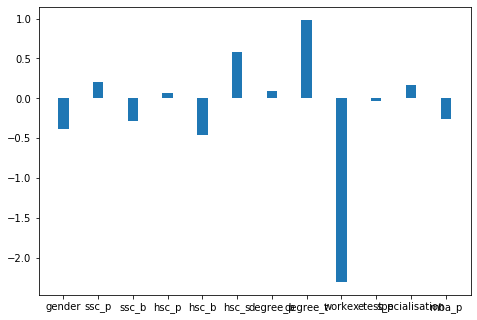

In [9]:
### Feature Importance through Logistic Regression  ###
logreg.fit(x,y)
# Check the importance of each feature
features = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p']
importance = logreg.coef_[0]
for i,v in enumerate(importance):
    print(' %s : %.5f' % (features[i],v))
# Plot the Graph of feature vs their importance
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(features, importance,width=0.3)
plt.show()

#Notice that the coefficients are both positive and negative. The positive scores indicate a feature that predicts class 1,
#whereas the negative scores indicate a feature that predicts class 0.
#Though the same doesn't provide with much clarity 

 gender : 0.01626
 ssc_p : 0.45783
 ssc_b : 0.00000
 hsc_p : 0.20643
 hsc_b : 0.00000
 hsc_s : 0.00000
 degree.p : 0.10881
 degree.t : 0.02453
 workex : 0.04428
 etest_p : 0.04553
 spec : 0.00000
 mba_p : 0.09633


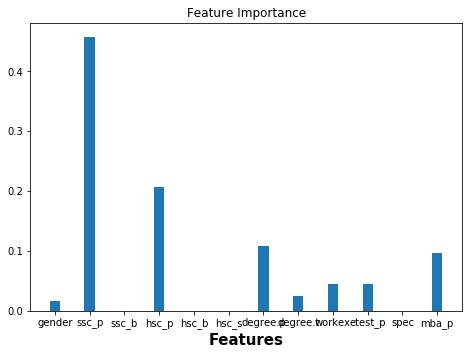

In [18]:
###  Feature importance using Decision Tree  ###
# Fit Data in Decision Tree
clf.fit(x,y)
# Check the importance of each feature
features = ['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree.p', 'degree.t', 'workex', 'etest_p', 'spec', 'mba_p']
importance = clf.feature_importances_
for i,v in enumerate(importance):
    print(' %s : %.5f' % (features[i],v))
# Plot the Graph of feature vs their importance
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(features, importance,width=0.3)
plt.title("Feature Importance")
plt.xlabel('Features', fontweight='bold', color = 'black', fontsize='15', horizontalalignment='center')
plt.show()


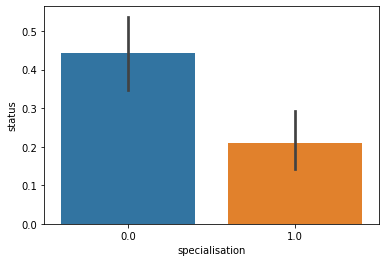

In [36]:
import seaborn as sns
z = data.loc[:,['specialisation', 'status']]
z.specialisation = ohe.fit_transform(data[['specialisation']])
z.status = ohe.fit_transform(data[['status']])
sns.barplot(y='status',x='specialisation',data=z);
sns.index=['MKT&HR','MKT&Fin']
# 0 -> MKT&HR
# 1 -> MKT&FIN